### Zadania
1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>



In [1]:
function L(x, k, xs)
    m = 1
    d = 1
    for i in 1:length(xs)
        if xs[k]!=xs[i]    
            d *=(x-xs[i])

            m *= (xs[k]-xs[i])
        end
    end                   
    return d/m
end

function interpolation(x, xs, ys)
    res = 0
    for i in 1:length(xs)
        res += L(x,i,xs)*ys[i]
    end
    return res
end

interpolation (generic function with 1 method)

In [2]:
xs =  1:1:10
ys = [rand() for x in xs]
xsf=1:0.01:10
ysf=[interpolation(x, xs, ys) for x in xsf];

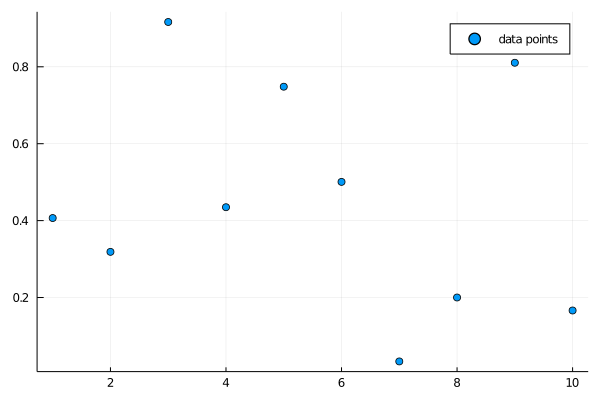

In [3]:
using Plots
plt1 = scatter(xs,ys, label="data points")


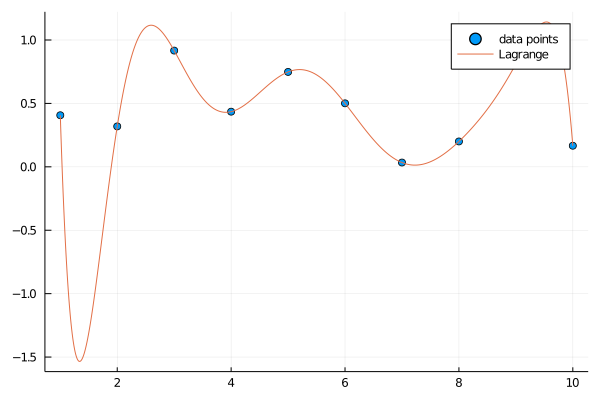

In [4]:
plt1 = plot!(xsf,ysf, label="Lagrange")

-------

2. Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>


In [5]:
function NewtonInterpolation(xs,ys)
    res = zeros(length(xs),length(xs))
    for i in 1:(length(ys))
        res[1,i] = ys[i]
    end
    a = length(xs)-1
    for i in 2:length(xs)
        for j in 1:a
            res[i,j] = (res[i-1,j+1] - res[i-1,j])/(xs[j+i-1]-xs[j])
        end
        a -=1
    end
    return res
end

NewtonInterpolation (generic function with 1 method)

In [6]:
function Horner(x, newt, xs)
    res = newt[1,1]
    for i in 2:length(xs)
        tmp = newt[i,1] 
        for j in 1:(i-1)
           tmp *= (x-xs[j]) 
        end
        res += tmp    
    end
    
    return res
end

Horner (generic function with 1 method)

In [7]:
newt = NewtonInterpolation(xs,ys);


In [8]:
ysf2=[Horner(x,newt, xs) for x in xsf];

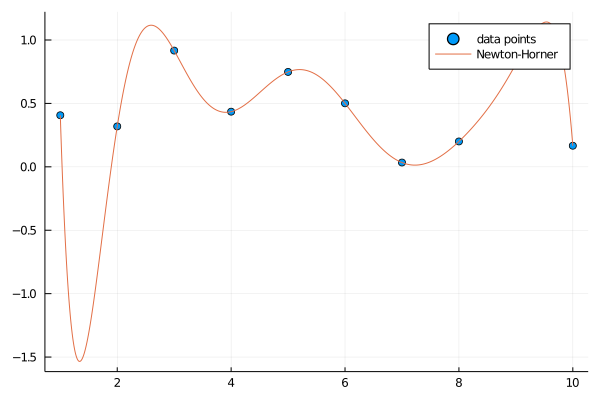

In [9]:
plt2 = scatter(xs,ys, label="data points")
plt2 = plot!(xsf,ysf2, label="Newton-Horner")

----------


3. Zastosowac interpolację wielomianową z pakietu Polynomials  do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>



In [10]:
using Polynomials
f = fit(xs, ys);

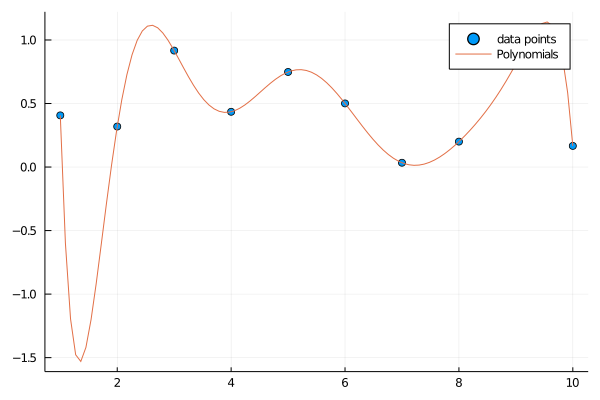

In [11]:
plt3 = scatter(xs,ys, label="data points")
plt3 = plot!(f, extrema(xs)..., label="Polynomials")

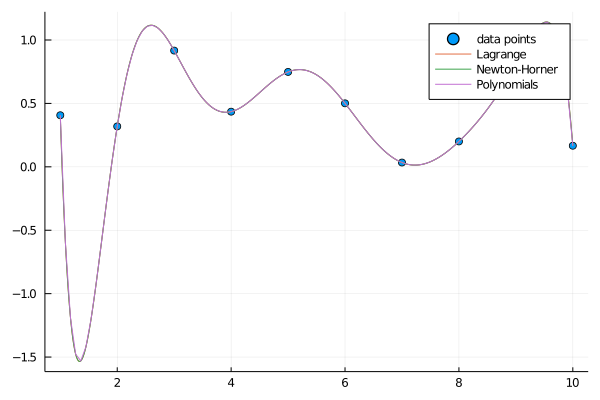

In [12]:
plt4 = scatter(xs,ys, label="data points")
plt4 = plot!(xsf,ysf, label="Lagrange")
plt4 = plot!(xsf,ysf2, label="Newton-Horner")
plt4 = plot!(f, extrema(xs)..., label="Polynomials")

Spostrzeżenie: wszystkie wykresy są identyczne.

----------------------------

4. Porownać  metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego.  Jako narzedzie do analizy danych użyć Julia DataFrames. <b>(2 pkt)</b>



In [13]:
using DataFrames
df = DataFrame(label=[], length=[], part_time_1=[], part_time_2=[], total_time=[])

M = 10


a = 5

for k=1:M
    

    
    xs_df =  1:1:a
    ys_df = [rand() for x in xs_df]
        
    if k==1
        b = time_ns()
        interpolation(a/2, xs_df, ys_df)
        e = time_ns()


        b1 = time_ns()
        newt = NewtonInterpolation( xs_df, ys_df)
        e1 = time_ns()

        b2 = time_ns()
        Horner(a/2, newt, xs_df)
        e2 = time_ns()

        b1 = time_ns()
        f = fit(xs_df, ys_df) 
        e1 = time_ns()
        b2 = time_ns()
        f(a*(2/3))
        e2 = time_ns()
        
    
    end
    
    
    for k=1:M
        b = time_ns()
        interpolation(a/2, xs_df, ys_df)
        e = time_ns()

        insert!.(eachcol(df), 1, ["Lagrange", a, NaN, NaN, e-b])

        b1 = time_ns()
        newt = NewtonInterpolation( xs_df, ys_df)
        e1 = time_ns()

        b2 = time_ns()
        Horner(a/2, newt, xs_df)
        e2 = time_ns()

        insert!.(eachcol(df), 1, ["Newton-Horner", a, e1-b1, e2-b2, (e1-b1 + e2-b2)])

        b1 = time_ns()
        f = fit(xs_df, ys_df) 
        e1 = time_ns()

        b2 = time_ns()
        f(a*(2/3))
        e2 = time_ns()

        insert!.(eachcol(df), 1, ["Polinomials", a, e1-b1, e2-b2, (e1-b1 + e2-b2)])

        
    end
    a +=5
    
end

In [14]:
using Statistics
ndf = DataFrame()
gdf1 = groupby(df, :label)
for i in 1:3
    gdf2 = groupby(gdf1[i], :length)
    for j in 1:M
        row = combine(gdf2[j],"label", "length",  "total_time" => mean, "total_time" => std)
        push!(ndf, row[1,:])
    end
end
ndf

,label,length,total_time_mean,total_time_std
,String,Int64,Float64,Float64
1,Polinomials,50,6340.0,245.855
2,Polinomials,45,4960.0,164.655
3,Polinomials,40,4380.0,147.573
4,Polinomials,35,4380.0,466.19
5,Polinomials,30,4020.0,154.919
6,Polinomials,25,3490.0,144.914
7,Polinomials,20,3290.0,334.83
8,Polinomials,15,2860.0,189.737
9,Polinomials,10,2590.0,237.814


In [15]:
plot_ndf = groupby(ndf, :label);

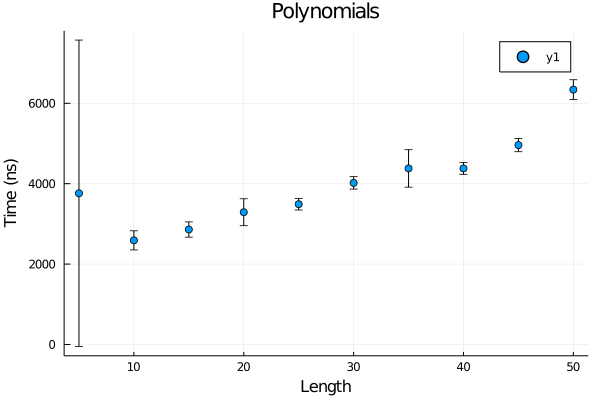

In [16]:
scatter(plot_ndf[1].length, plot_ndf[1].total_time_mean, yerr=plot_ndf[1].total_time_std, title="Polynomials", xlabel="Length",ylabel="Time (ns)")

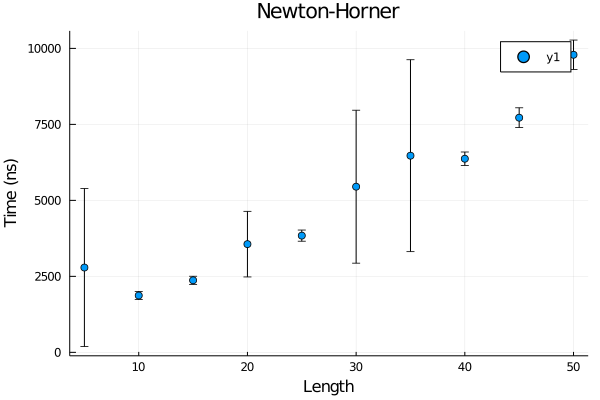

In [17]:
scatter(plot_ndf[2].length, plot_ndf[2].total_time_mean, yerr=plot_ndf[2].total_time_std, title="Newton-Horner", xlabel="Length",ylabel="Time (ns)")

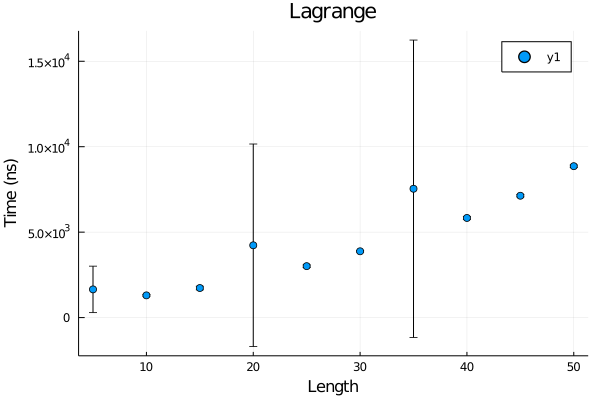

In [18]:
scatter(plot_ndf[3].length, plot_ndf[3].total_time_mean, yerr=plot_ndf[3].total_time_std, title="Lagrange", xlabel="Length",ylabel="Time (ns)")

In [19]:
ndf2 = DataFrame()
gdf3 = groupby(df, :label)
for i in 1:3
    gdf4 = groupby(gdf3[i], :length)
    for j in 1:M
        row = combine(gdf4[j],"label", "length",  "part_time_1" => mean, "part_time_1" => std,"part_time_2" => mean, "part_time_2" => std)
        push!(ndf2, row[1,:])
    end
end
ndf2[1:20,:]

,label,length,part_time_1_mean,part_time_1_std,part_time_2_mean,part_time_2_std
,String,Int64,Float64,Float64,Float64,Float64
1,Polinomials,50,5140.0,217.051,1200.0,66.6667
2,Polinomials,45,4000.0,182.574,960.0,51.6398
3,Polinomials,40,3410.0,137.032,970.0,48.3046
4,Polinomials,35,3290.0,354.181,1090.0,119.722
5,Polinomials,30,2840.0,142.984,1180.0,42.1637
6,Polinomials,25,2340.0,134.99,1150.0,52.7046
7,Polinomials,20,2090.0,280.674,1200.0,81.6497
8,Polinomials,15,1700.0,124.722,1160.0,84.3274
9,Polinomials,10,1460.0,211.87,1130.0,48.3046


In [20]:
plot_ndf2 = groupby(ndf2, :label);

Wyliczanie wielomianu

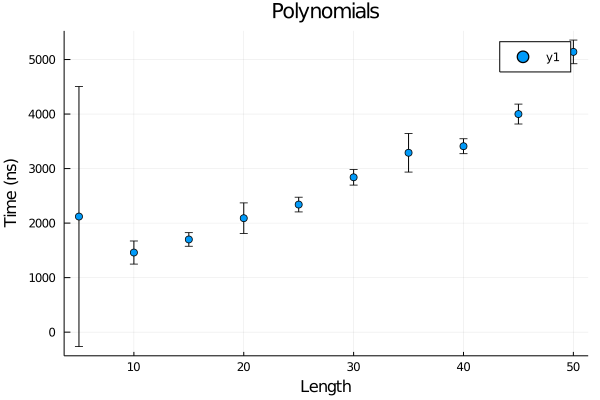

In [21]:
scatter(plot_ndf2[1].length, plot_ndf2[1].part_time_1_mean, yerr=plot_ndf2[1].part_time_1_std, title="Polynomials", xlabel="Length",ylabel="Time (ns)")

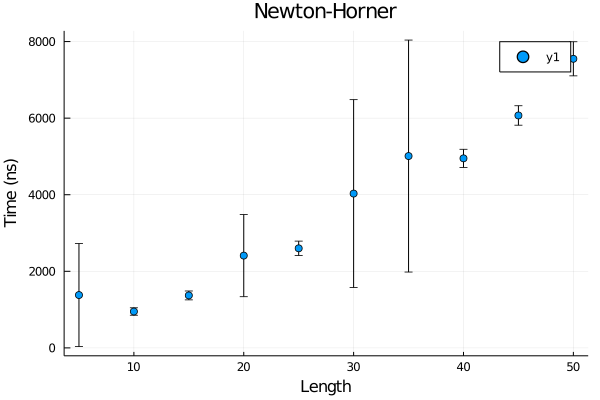

In [22]:
scatter(plot_ndf2[2].length, plot_ndf2[2].part_time_1_mean, yerr=plot_ndf2[2].part_time_1_std, title="Newton-Horner", xlabel="Length",ylabel="Time (ns)")

Wyliczanie wartości punktu

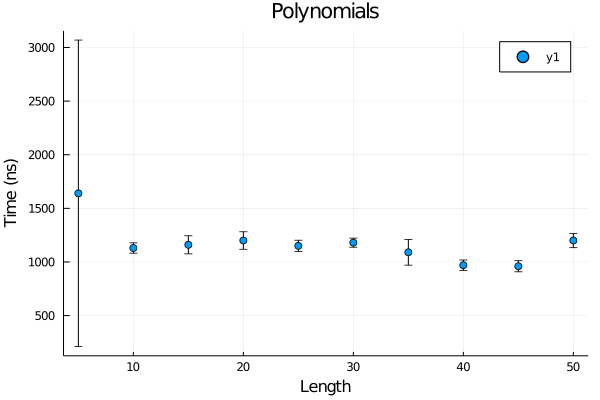

In [23]:
scatter(plot_ndf2[1].length, plot_ndf2[1].part_time_2_mean, yerr=plot_ndf2[1].part_time_2_std, title="Polynomials", xlabel="Length",ylabel="Time (ns)")

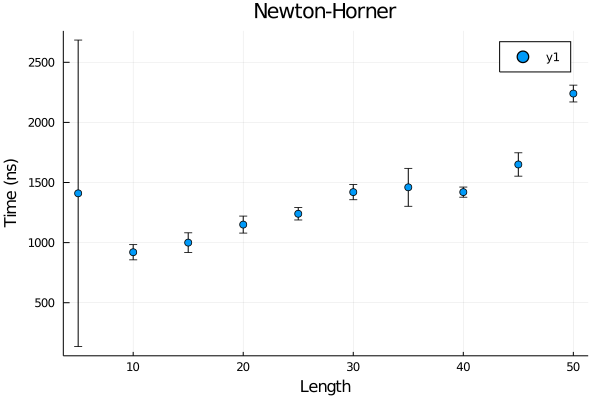

In [24]:
scatter(plot_ndf2[2].length, plot_ndf2[2].part_time_2_mean, yerr=plot_ndf2[2].part_time_2_std, title="Newton-Horner", xlabel="Length",ylabel="Time (ns)")

5. Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

In [25]:
function Neville(x, xs,ys)
    res = zeros(length(xs),length(xs))
    for i in 1:(length(ys))
        res[1,i] = ys[i]
    end
    a = length(xs)-1
    for i in 2:length(xs)
        for j in 1:a
            res[i,j] = (res[i-1,j+1]*(xs[j]-x) + res[i-1,j]*(x-xs[j+i-1]))/(xs[j]-xs[j+i-1])
        end
        a -=1
    end
    return res[10,1]
end

Neville (generic function with 1 method)

In [26]:
ysf3=[Neville(x,xs, ys) for x in xsf];

901-element Array{Float64,1}:
  0.4066747545491937
  0.27097548029085067
  0.14162708777348318
  0.018457664853198996
 -0.09870145821520107
 -0.21001575331660036
 -0.31564753857001704
 -0.41575602198219913
 -0.5104973446634387
 -0.600024623608653
 -0.6844879940467761
 -0.7640346513614891
 -0.8388088925862974
  ⋮
  0.6551161152434326
  0.6199292175419471
  0.5830511142616183
  0.5444307911993465
  0.5040160648112965
  0.46175356199785067
  0.41758869963529943
  0.37146566385209034
  0.3233273890475061
  0.2731155366504534
  0.22077047361632007
  0.1662312506595678

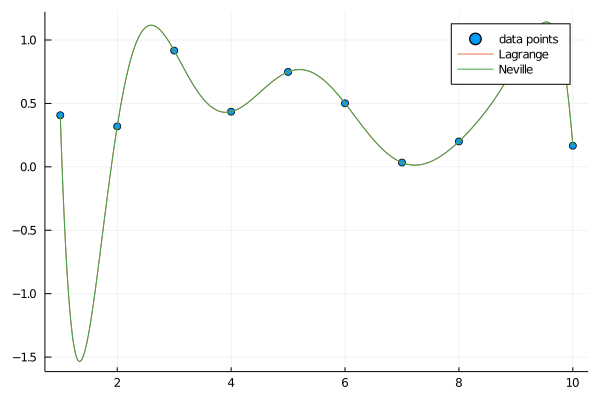

In [27]:
plt4 = scatter(xs,ys, label="data points")
plt4 = plot!(xsf,ysf, label="Lagrange")
plt4 = plot!(xsf,ysf3, label="Neville")

6. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 

In [42]:
xsa = xs[1:5]
ysa = ys[1:5]

xsb = xs[5:8]
ysb = ys[5:8]

xsc = xs[7:10]
ysc = ys[7:10]

newta = NewtonInterpolation(xsa,ysa)
newtb = NewtonInterpolation(xsb,ysb)
newtc = NewtonInterpolation(xsc,ysc)

xsfa=1:0.01:4.99
xsfb=5:0.01:7.99
xsfc=8:0.01:10

xsf4 = vcat(xsfa, xsfb, xsfc)

ysf4a=[Horner(x,newta, xsa) for x in xsfa]
ysf4b=[Horner(x,newtb, xsb) for x in xsfb]
ysf4c=[Horner(x,newtc, xsc) for x in xsfc]

ysf4 = vcat(ysf4a, ysf4b, ysf4c);

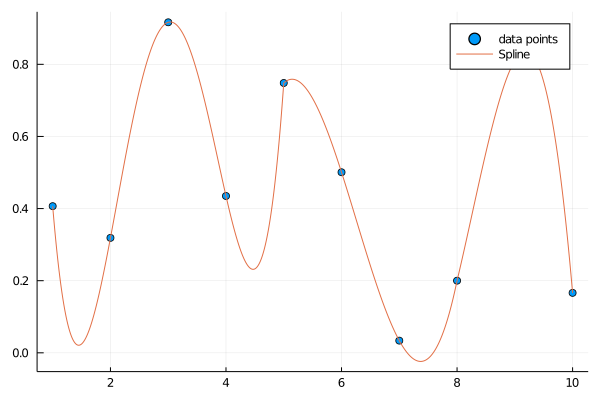

In [43]:
plt5 = scatter(xs,ys, label="data points")
plt5 = plot!(xsf4,ysf4, label="Spline")

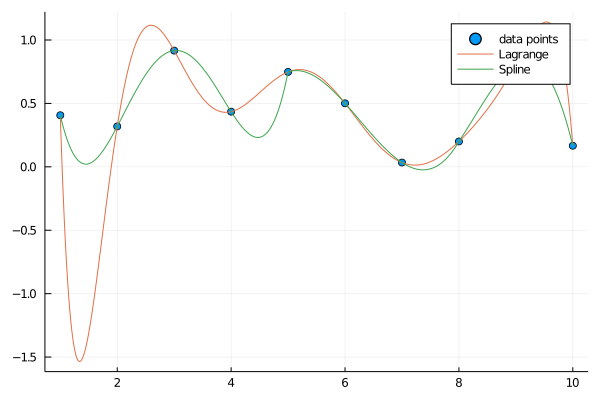

In [44]:
plt6 = scatter(xs,ys, label="data points")
plt6 = plot!(xsf,ysf, label="Lagrange")
plt6 = plot!(xsf4,ysf4, label="Spline")

In [45]:
ysf5a=[interpolation(x, xsa, ysa) for x in xsfa]
ysf5b=[interpolation(x, xsb, ysb) for x in xsfb]
ysf5c=[interpolation(x, xsc, ysc) for x in xsfc]
ysf5 = vcat(ysf4a, ysf4b, ysf4c);

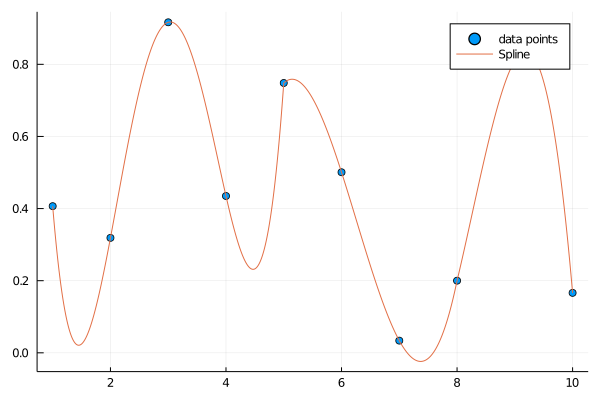

In [46]:
plt7 = scatter(xs,ys, label="data points")
plt7 = plot!(xsf4,ysf5, label="Spline")

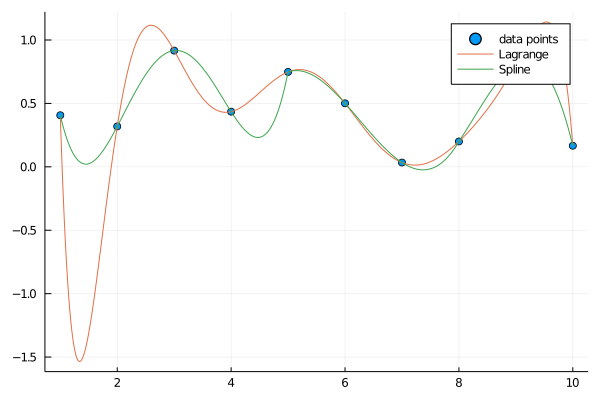

In [47]:
plt8 = scatter(xs,ys, label="data points")
plt8 = plot!(xsf,ysf, label="Lagrange")
plt8 = plot!(xsf4,ysf5, label="Spline")